# Pomysł
Zrobić wykres https://datavizproject.com/data-type/proportional-area-chart/ korzystając z danych https://en.wikipedia.org/wiki/List_of_highest-grossing_media_franchises ew z tego https://en.wikipedia.org/wiki/List_of_best-selling_video_game_franchises 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify 
import matplotlib.patches as patches
import kaleido
import plotly.express as px
import textwrap
import plotly.io as pio

ModuleNotFoundError: No module named 'kaleido'

In [ ]:
df=pd.read_excel('franchise_worth.xlsx')
df

,id,franchise,year of inception,total revenue (est. US$),original medium,creator,owner
0,1,Pokémon,1996,115000000000,Video game,Satoshi Tajiri,The Pokémon Company; Nintendo
1,2,Mickey Mouse & Friends,1928,61200000000,Animated cartoon,Walt Disney; Ub Iwerks,The Walt Disney Company
2,3,Winnie the Pooh,1924,50200000000,Book,A. A. Milne; E. H. Shepard,The Walt Disney Company
3,4,Star Wars,1977,46700000000,Film,George Lucas,Lucasfilm (The Walt Disney Company)
4,5,Disney Princess,2000,45400000000,Animated films,Andy Mooney,The Walt Disney Company
5,6,Anpanman,1973,38300000000,Picture book,Takashi Yanase,Froebel-kan (Toppan Printing Co.)
6,7,Barbie,1987,36300000000,Television special,Ruth Handler,Mattel
7,8,Marvel Cinematic Universe,2008,35200000000,Film,Marvel Studios; Stan Lee; Jack Kirby,"Walt Disney Studios (The Walt Disney Company),..."
8,9,Wizarding World (Harry Potter),1997,34700000000,Novel,J. K. Rowling,"J. K. Rowling (books), Warner Bros. (Warner Br..."
9,10,Hello Kitty,1974,33500000000,Cartoon character,Yuko Shimizu; Shintaro Tsuji,Sanrio


In [ ]:

# 2. Czyszczenie kolumny Revenue
# Funkcja usuwająca '$', 'billion', 'est.' i zamieniająca na liczby
def clean_revenue(val):
    if pd.isna(val): return 0
    val = str(val).lower()
    val = val.replace('$', '').replace('est.', '').replace('billion', '').replace(',', '').strip()
    val=float(val)
    val = val/1000000000
    try:
        return val
    except ValueError:
        return 0



/var/folders/ks/l5k0stm95w5b5kn73hwp_8hc0000gn/T/ipykernel_28403/733711817.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Spectral')


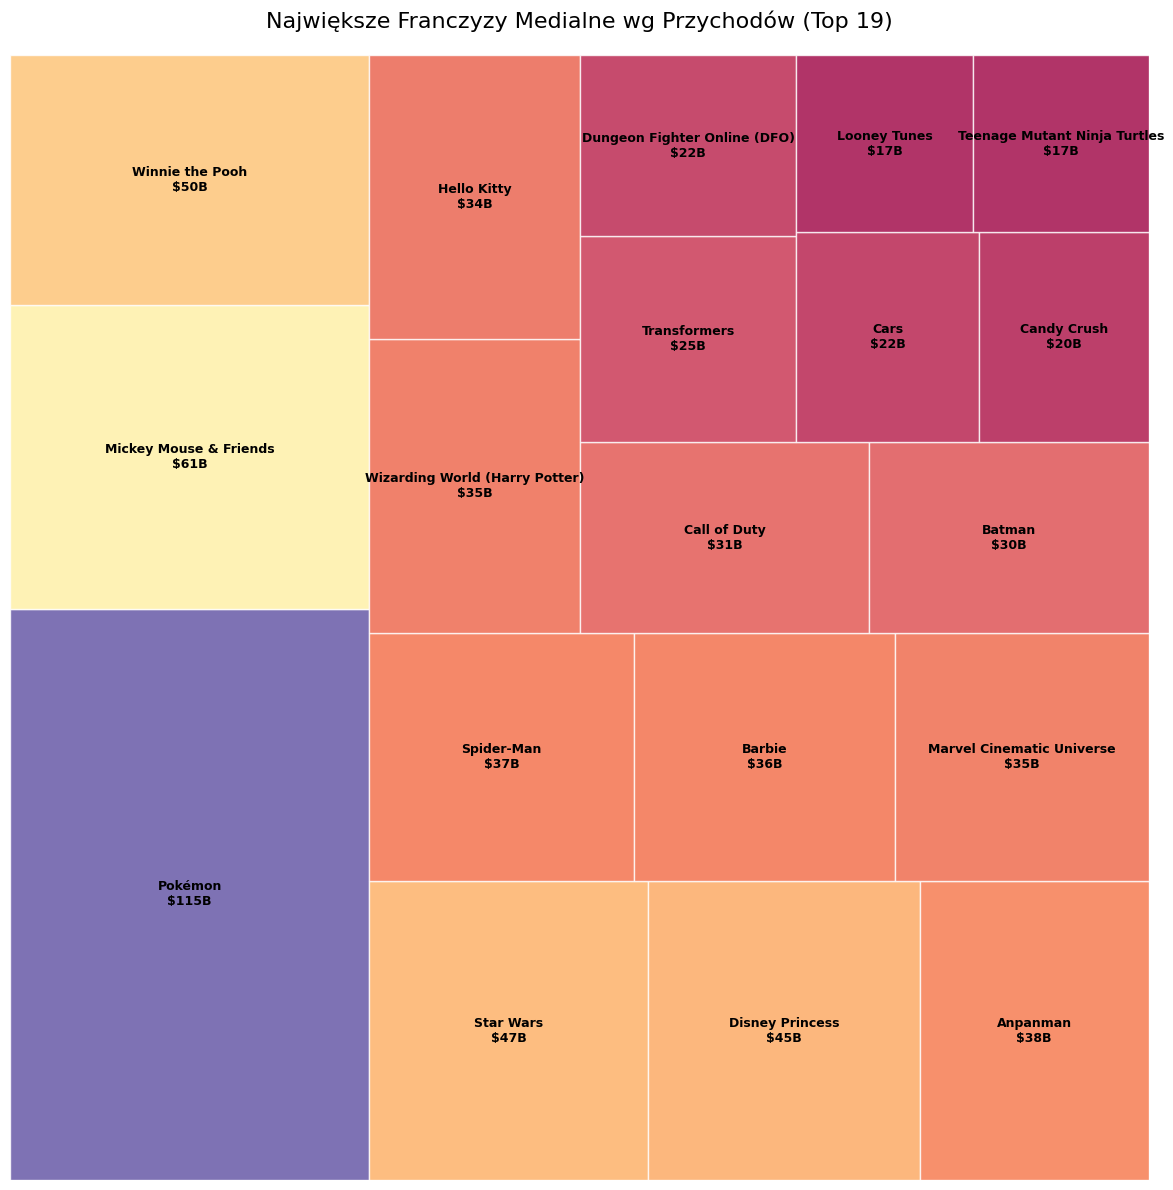

In [ ]:

col_revenue = 'total revenue (est. US$)'
col_franchise = 'franchise'
# Aplikujemy czyszczenie
df['clean_revenue'] = df[col_revenue].apply(clean_revenue)

# Sortujemy malejąco (największe na górze) i bierzemy np. TOP 50, żeby wykres był czytelny
# Jeśli chcesz wszystkie, usuń .head(50)
df_plot = df.sort_values('clean_revenue', ascending=False).head(20)

# --- 3. Przygotowanie danych do wykresu ---
sizes = df_plot['clean_revenue'].values
labels = df_plot[col_franchise].values

# Etykiety z kwotą (np. "Pokémon\n$90B")
plot_labels = [f'{label}\n${value:,.0f}B' for label, value in zip(labels, sizes)]

# Kolory (Spectral wygląda dobrze przy dużej liczbie elementów)
cmap = plt.cm.get_cmap('Spectral')
norm = plt.Normalize(min(sizes), max(sizes))
colors = [cmap(norm(value)) for value in sizes]

# --- 4. Rysowanie Treemapy ---
plt.figure(figsize=(12, 12)) # Kwadratowy rozmiar sprzyja kwadratowym kafelkom

squarify.plot(
    sizes=sizes,
    label=plot_labels,
    color=colors,
    alpha=0.8,
    bar_kwargs={'linewidth': 1, 'edgecolor': 'white'},
    text_kwargs={'fontsize': 9, 'color': 'black', 'weight': 'bold'}
)

plt.title(f'Największe Franczyzy Medialne wg Przychodów (Top {len(df_plot)})', fontsize=16, pad=20)
plt.axis('off')

plt.tight_layout()
plt.savefig('franchise_revenue_treemap.png')

In [ ]:
col_revenue = 'total revenue (est. US$)'
col_franchise = 'franchise'
# Aplikujemy czyszczenie
df['clean_revenue'] = df[col_revenue].apply(clean_revenue)
df_plot = df.sort_values('clean_revenue', ascending=False).head(20)


In [ ]:
color_map = {
    'Animated film': '#FFD700',  # złoty (jasny)
    'Video game': '#2F4F4F',    # ciemnoszary (ciemny)
    'Comic book': '#FF6347',    # pomidorowy
    'Book': '#8B4513',          # brązowy (ciemny)
    'Anime': '#E6E6FA'          # lawendowy (jasny)
}

fig = px.treemap(df_plot, path=['original medium', 'franchise'], values='clean_revenue', color='original medium', color_discrete_map=color_map)

fig.update_layout(title_text='Franchise Worth Sorted by Original Medium (Top 20)', title_x=0.5)


fig.update_traces(marker=dict(cornerradius=5))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
col_revenue = 'total revenue (est. US$)'
col_franchise = 'franchise'
# Aplikujemy czyszczenie
df['clean_revenue'] = df[col_revenue].apply(clean_revenue)
df_plot = df.sort_values('clean_revenue', ascending=False).head(15)
df_plot['wrapped_label'] = df_plot['franchise'].apply(lambda x: '<br>'.join(textwrap.wrap(x, width=15)))
df_plot['revenue_text'] = df_plot['clean_revenue'].apply(lambda x: f'{x:.1f} B')


fig = px.treemap(df_plot, path=['franchise'], values='clean_revenue', custom_data=['revenue_text', 'wrapped_label'])

#fig.update_layout(title_text='Franchise Worth Sorted by Original Medium (Billions of $)', title_x=0.5)


fig.update_traces(
    # Używamy owiniętej nazwy zamiast oryginalnego label
    texttemplate="<b>%{customdata[1]}</b><br>%{customdata[0]}",
    textposition="middle center",
    textfont_size=11 # Tutaj zmniejszasz czcionkę
)

fig.update_layout(
    # minsize=8 pozwoli na wyświetlenie nawet mniejszych napisów
    title_text='Franchise Worth in Billions of Dollars (Top 20)',
    title_x=0.5,
    uniformtext=dict(minsize=8, mode='show'),
    margin=dict(t=50, l=25, r=25, b=25)
)

#fig.update_traces(marker=dict(cornerradius=5))

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
fig = px.treemap(
    df_plot, 
    px.Constant(" "),
    path=[px.Constant(" "), 'franchise'], 
    values='clean_revenue',
    custom_data=['revenue_text', 'wrapped_label'],
    color='clean_revenue', 
    color_continuous_scale='Blues',
)


fig.update_traces(
    # Używamy owiniętej nazwy zamiast oryginalnego label
    texttemplate="<b>%{customdata[1]}</b><br>%{customdata[0]}",
    textposition="middle center",
    textfont_size=13,
    tiling=dict(packing='squarify'),
    marker=dict(
        pad=dict(t=5, l=5, r=5, b=5),  # Zerujemy odstęp wewnętrzny
        line=dict(width=2, color='white') # Ustawiamy białą ramkę między kafelkami
    )
)


fig.update_layout(
    title_text='Franchise Worth (Top 20, US$)',
    title_x=0.5,
    margin=dict(t=50, l=10, r=10, b=10),
    width=800,  
    height=800, 
    uniformtext=dict(minsize=10, mode='show'),

    coloraxis=dict(
        colorbar_title_text='Revenue<br>(B$)', # <br> łamie linię
        colorbar_title_side='top', # Tytuł nad paskiem
        colorbar_len=0.9,
        colorbar_yanchor="top", colorbar_y=1,
    )
    
)

fig.add_layout_image(
    dict(
        source='images/images/143.png',
        xref="paper", yref="paper", # Pozycjonowanie względem całego płótna
        x=1.01, y=0.11,  
        sizex=0.12, sizey=0.12, # Rozmiar obrazka (współczynnik 0-1)
        xanchor="left", yanchor="top", # Punkt zakotwiczenia obrazka
        layer="above" # Obrazek ma być na wierzchu
    )
)

fig.add_layout_image(
    dict(
        source='franchise_images/1.png',
        xref="paper", yref="paper", # Pozycjonowanie względem całego płótna
        x=0.153, y=0.917,  
        sizex=0.2, sizey=0.2, # Rozmiar obrazka (współczynnik 0-1)
        xanchor="left", yanchor="top", # Punkt zakotwiczenia obrazka
        layer="above" # Obrazek ma być na wierzchu
    )
)

# fig.add_layout_image(
#     dict(
#         source='franchise_images/2.png',
#         xref="paper", yref="paper", # Pozycjonowanie względem całego płótna
#         x=0.548, y=0.93,  
#         sizex=0.2, sizey=0.2, # Rozmiar obrazka (współczynnik 0-1)
#         xanchor="left", yanchor="top", # Punkt zakotwiczenia obrazka
#         layer="above" # Obrazek ma być na wierzchu
#     )
# )


fig.write_image("franchise_worth.png",engine="vl-convert", scale=3) #trzeba mieć zainstalowane kaleido, na mac: pip install kaleido==0.2.1
fig.show()

/var/folders/ks/l5k0stm95w5b5kn73hwp_8hc0000gn/T/ipykernel_28403/2701841102.py:76: DeprecationWarning:


Support for the 'engine' argument is deprecated and will be removed after September 2025.
Kaleido will be the only supported engine at that time.




ValueError: Invalid image export engine specified: 'vl-convert'

In [ ]:
## BEZ OBRAZKÓW

In [ ]:
fig = px.treemap(
    df_plot, 
    px.Constant(" "),
    path=[px.Constant(" "), 'franchise'], 
    values='clean_revenue',
    custom_data=['revenue_text', 'wrapped_label'],
    color='clean_revenue', 
    color_continuous_scale='Reds',
)


fig.update_traces(
    # Używamy owiniętej nazwy zamiast oryginalnego label
    texttemplate="<b>%{customdata[1]}</b><br>%{customdata[0]}",
    textposition="middle center",
    textfont_size=13,
    tiling=dict(packing='squarify'),
    marker=dict(
        pad=dict(t=5, l=5, r=5, b=5),  # Zerujemy odstęp wewnętrzny
        line=dict(width=2, color='white') # Ustawiamy białą ramkę między kafelkami
    )
)


fig.update_layout(
    title_text='Franchise Worth (Top 20, US$)',
    title_x=0.5,
    margin=dict(t=50, l=10, r=10, b=10),
    width=800,  
    height=800, 
    uniformtext=dict(minsize=10, mode='show'),

    coloraxis=dict(
        colorbar_title_text='Revenue<br>(B$)', # <br> łamie linię
        colorbar_title_side='top', # Tytuł nad paskiem
        colorbar_len=0.9,
        colorbar_yanchor="top", colorbar_y=1,
    )
    
)

fig.add_layout_image(
    dict(
        source='images/images/5.png',
        xref="paper", yref="paper", # Pozycjonowanie względem całego płótna
        x=1.01, y=0.11,  
        sizex=0.12, sizey=0.12, # Rozmiar obrazka (współczynnik 0-1)
        xanchor="left", yanchor="top", # Punkt zakotwiczenia obrazka
        layer="above" # Obrazek ma być na wierzchu
    )
)



#fig.write_image("franchise_worth.png") #trzeba mieć zainstalowane kaleido
fig.show()

## EWENTUALNOŚĆ - jakby miały być obrazki na tym też

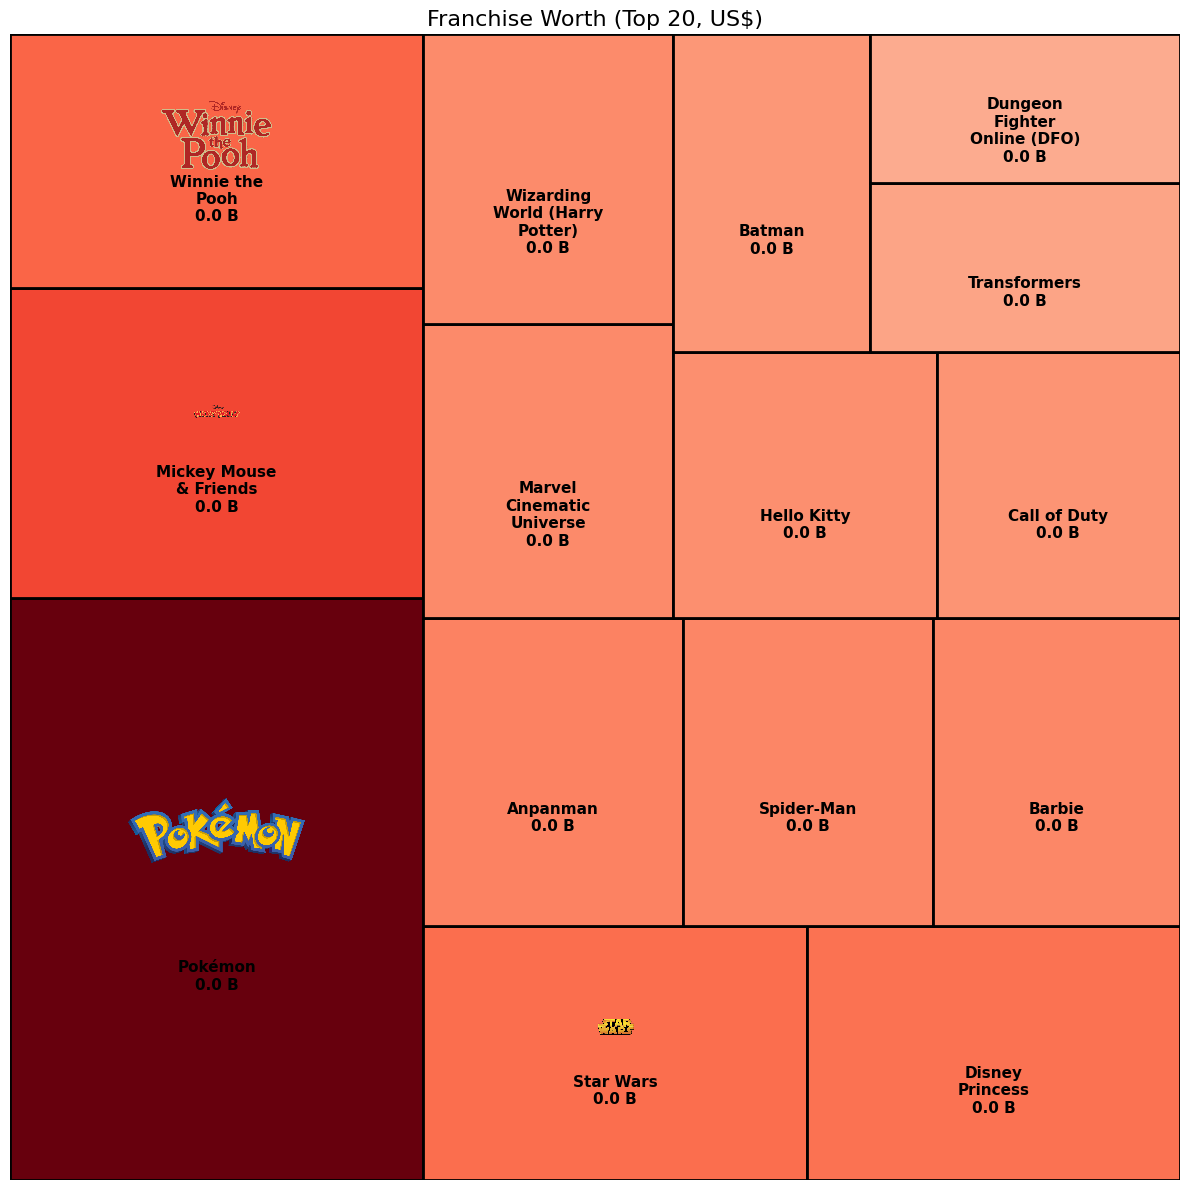

In [ ]:
import matplotlib.pyplot as plt
import squarify
import matplotlib.patches as patches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd
import os

# --- 1. Przygotowanie danych (Symulacja Twoich danych) ---
# Upewnij się, że masz posortowane dane!
df_plot = df_plot.sort_values('clean_revenue', ascending=False)
values = df_plot['clean_revenue'].tolist()
labels = df_plot['franchise'].tolist()
ids = df_plot['id'].tolist() # Zakładam, że masz kolumnę 'id'
formatted_values = (df_plot['clean_revenue'] / 1e9).apply(lambda x: f'{x:.1f} B').tolist()

# --- 2. Obliczanie współrzędnych prostokątów ---
# Normujemy wartości do wymiarów wykresu 100x100
x = 0.
y = 0.
width = 100.
height = 100.

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# --- 3. Rysowanie ---
fig, ax = plt.subplots(figsize=(12, 12))

# Ustawienie osi
ax.set_xlim(0, width)
ax.set_ylim(0, height)
ax.axis('off') # Ukrywamy osie

# Mapa kolorów (podobna do Reds z Plotly)
cmap = plt.cm.Reds
# Normalizacja kolorów (żeby największy był najciemniejszy)
max_val = max(values)
min_val = min(values)

# Pętla po każdym kafelku
for rect, val, label, fmt_val, img_id in zip(rects, values, labels, formatted_values, ids):
    x, y, dx, dy = rect['x'], rect['y'], rect['dx'], rect['dy']
    
    # A. Rysowanie prostokąta (tło)
    # Obliczamy kolor na podstawie wartości
    color_norm = (val - min_val) / (max_val - min_val) 
    color = cmap(0.3 + 0.7 * color_norm) # 0.3 to start, żeby nie było całkiem biało
    
    # Tworzymy prostokąt z czarną ramką (linewidth=2)
    patch = patches.Rectangle((x, y), dx, dy, linewidth=2, edgecolor='black', facecolor=color)
    ax.add_patch(patch)
    
    # B. Dodawanie tekstu (Na środku, lekko w dół)
    # Dzielimy tekst label na linie, jeśli za długi
    import textwrap
    wrapped_label = "\n".join(textwrap.wrap(label, width=12))
    full_text = f"{wrapped_label}\n{fmt_val}"
    
    ax.text(x + dx/2, y + dy/2 - dy*0.15, full_text, # Przesuwamy tekst lekko w dół (-dy*0.15)
            fontsize=11, fontweight='bold', color='black', 
            ha='center', va='center')

    # C. Dodawanie obrazka (Logo)
    # Ścieżka do pliku (zakładam rozszerzenie .png, zmień jeśli masz .jpg)
    img_path = f"franchise_images/{img_id}.png"
    
    if os.path.exists(img_path):
        img = plt.imread(img_path)
        
        # Skalowanie obrazka - trzeba dobrać zoom eksperymentalnie lub dynamicznie
        # Tutaj prosty trik: zoom zależny od wielkości kafelka
        zoom_factor = min(dx, dy) * 0.003 # Współczynnik do dostrojenia
        
        imagebox = OffsetImage(img, zoom=zoom_factor)
        imagebox.image.axes = ax
        
        # Umieszczamy obrazek nieco powyżej środka
        ab = AnnotationBbox(imagebox, (x + dx/2, y + dy/2 + dy*0.1),
                            frameon=False, pad=0)
        ax.add_artist(ab)

plt.title('Franchise Worth (Top 20, US$)', fontsize=16)
plt.tight_layout()
plt.show()